<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/DIVICAnalysisHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Know the basic flow of data analysis
Get used to Pandas, a data analysis library
Use Kaggle Notebooks.

Using the Ames, Iowa home price dataset, we will learn how to work with basic data.

There are 79 types of explanatory variables related to housing, so let's explore the relationship between them and prices.

It is also a good idea to check out Wikipedia to see what kind of city Ames is.

Ames, Iowa-Wikipedia

Kaggle has "Notebooks" where various people share their data exploration (EDA) code. Let's look at a lot of good EDA and absorb the know-how. You can also refer to them in doing this assignment, or challenge yourself to do something that is not in the assignment.

We will be using Kaggle from now on, so please create an account.

《Reference Notebooks》

Comprehensive data exploration with Python | Kaggle (Let's start here)

House Prices: EDA to ML (Beginner) | Kaggle

A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle

In [1]:
import numpy as np
import pandas as pd



**[Problem 1] Obtaining a dataset**

Usepd.read_csv () to store it in a variable.

In [3]:
df = pd.read_csv('train.csv')


In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


**[Problem 2] Investigating the dataset itself**

Please explain what kind of dataset it is by reading Kaggle's Overview page and "Data fields" on the Data page

This data set describes the house characteristics and its area, every characteristic represent a explanatory variable, in total are 79.
The objective variable is the price.
Considering the explanatory variables and modeling these ones the final price of the house will be predicted.

**[Problem 3] Checking the data**

Let's check the data. Please report using a combination of code and markdown.

See what each feature is about. (Numerical data or text data, etc.)
Check which column is the target variable this time.
Display the mean, standard deviation, and quartiles of the feature values at once.

See what each feature is about. (Numerical data or text data, etc.)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Check which column is the target variable this time.

In [6]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Display the mean, standard deviation, and quartiles of the feature values at once.

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**[Problem 4] Dealing with missing values**

Do the following for missing values and report back.

Check for missing values for each feature.
To check for missing values, we can use a library calledmissingno. This library allows you to visualize the presence of missing values. For installation and usage, please refer to the following page.

ResidentMario / missingno: Missing data visualization module for Python.

Check the percentage of missing values.

In [9]:
import pandas as pd
import missingno as msno

In [10]:
df = pd.read_csv('train.csv')

<Axes: >

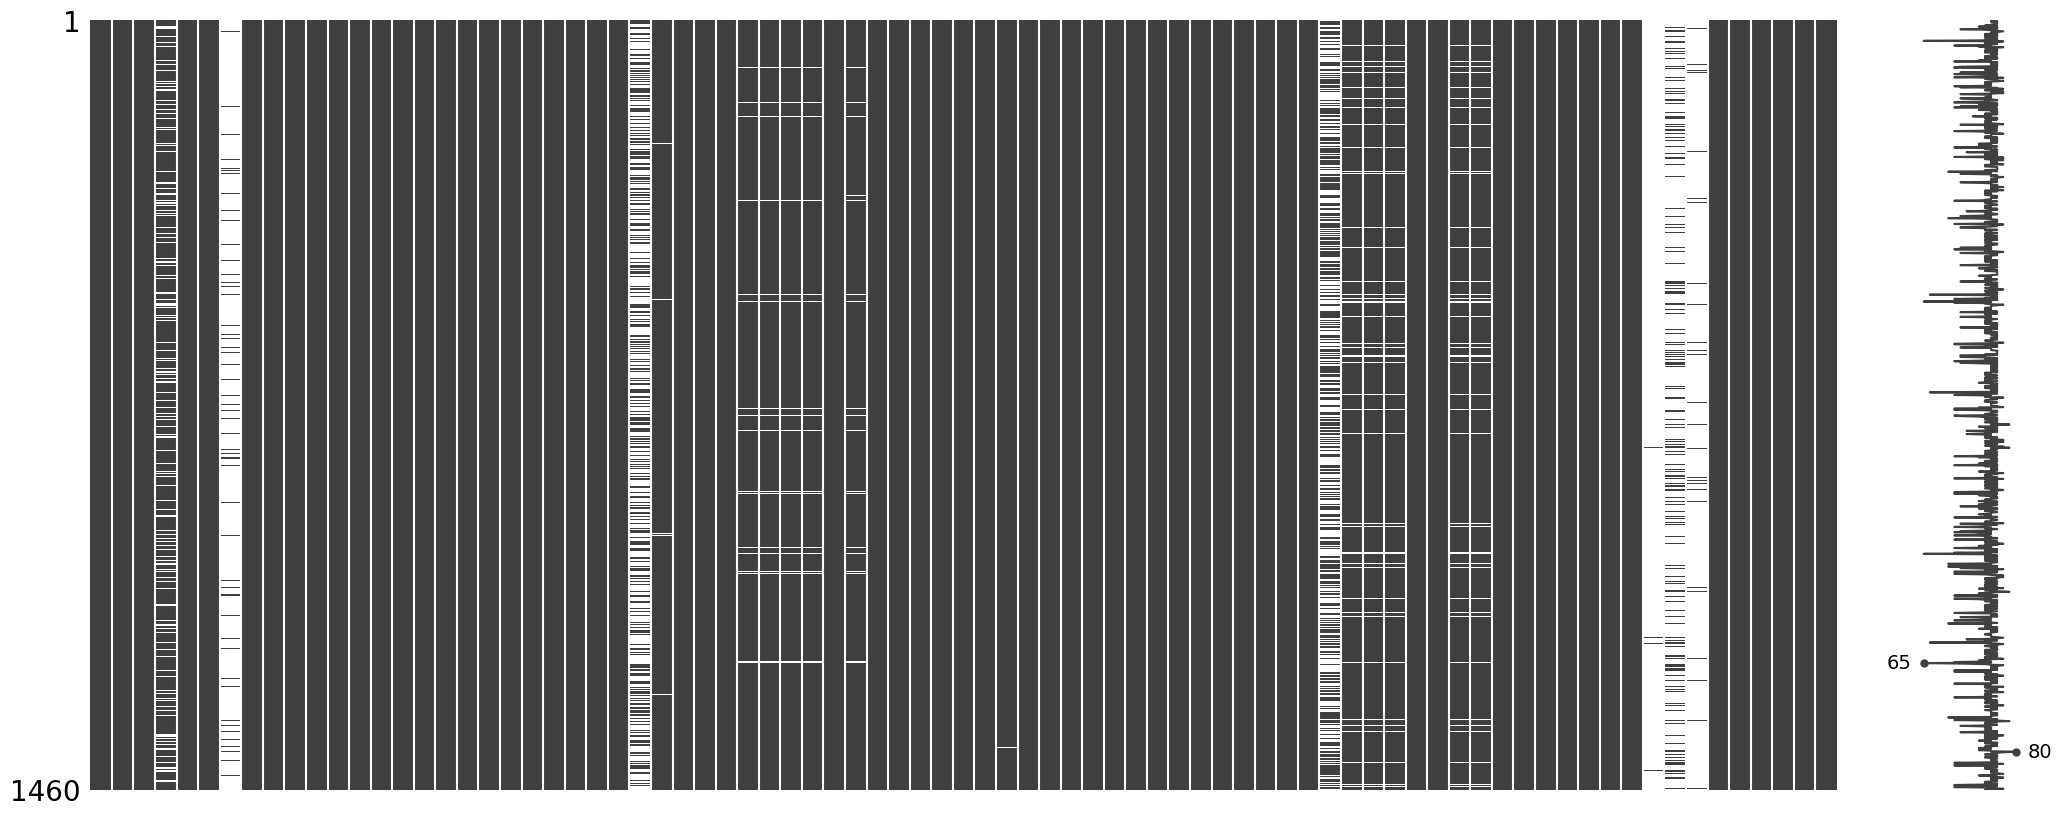

In [11]:
#visualization
msno.matrix(df)

<Axes: >

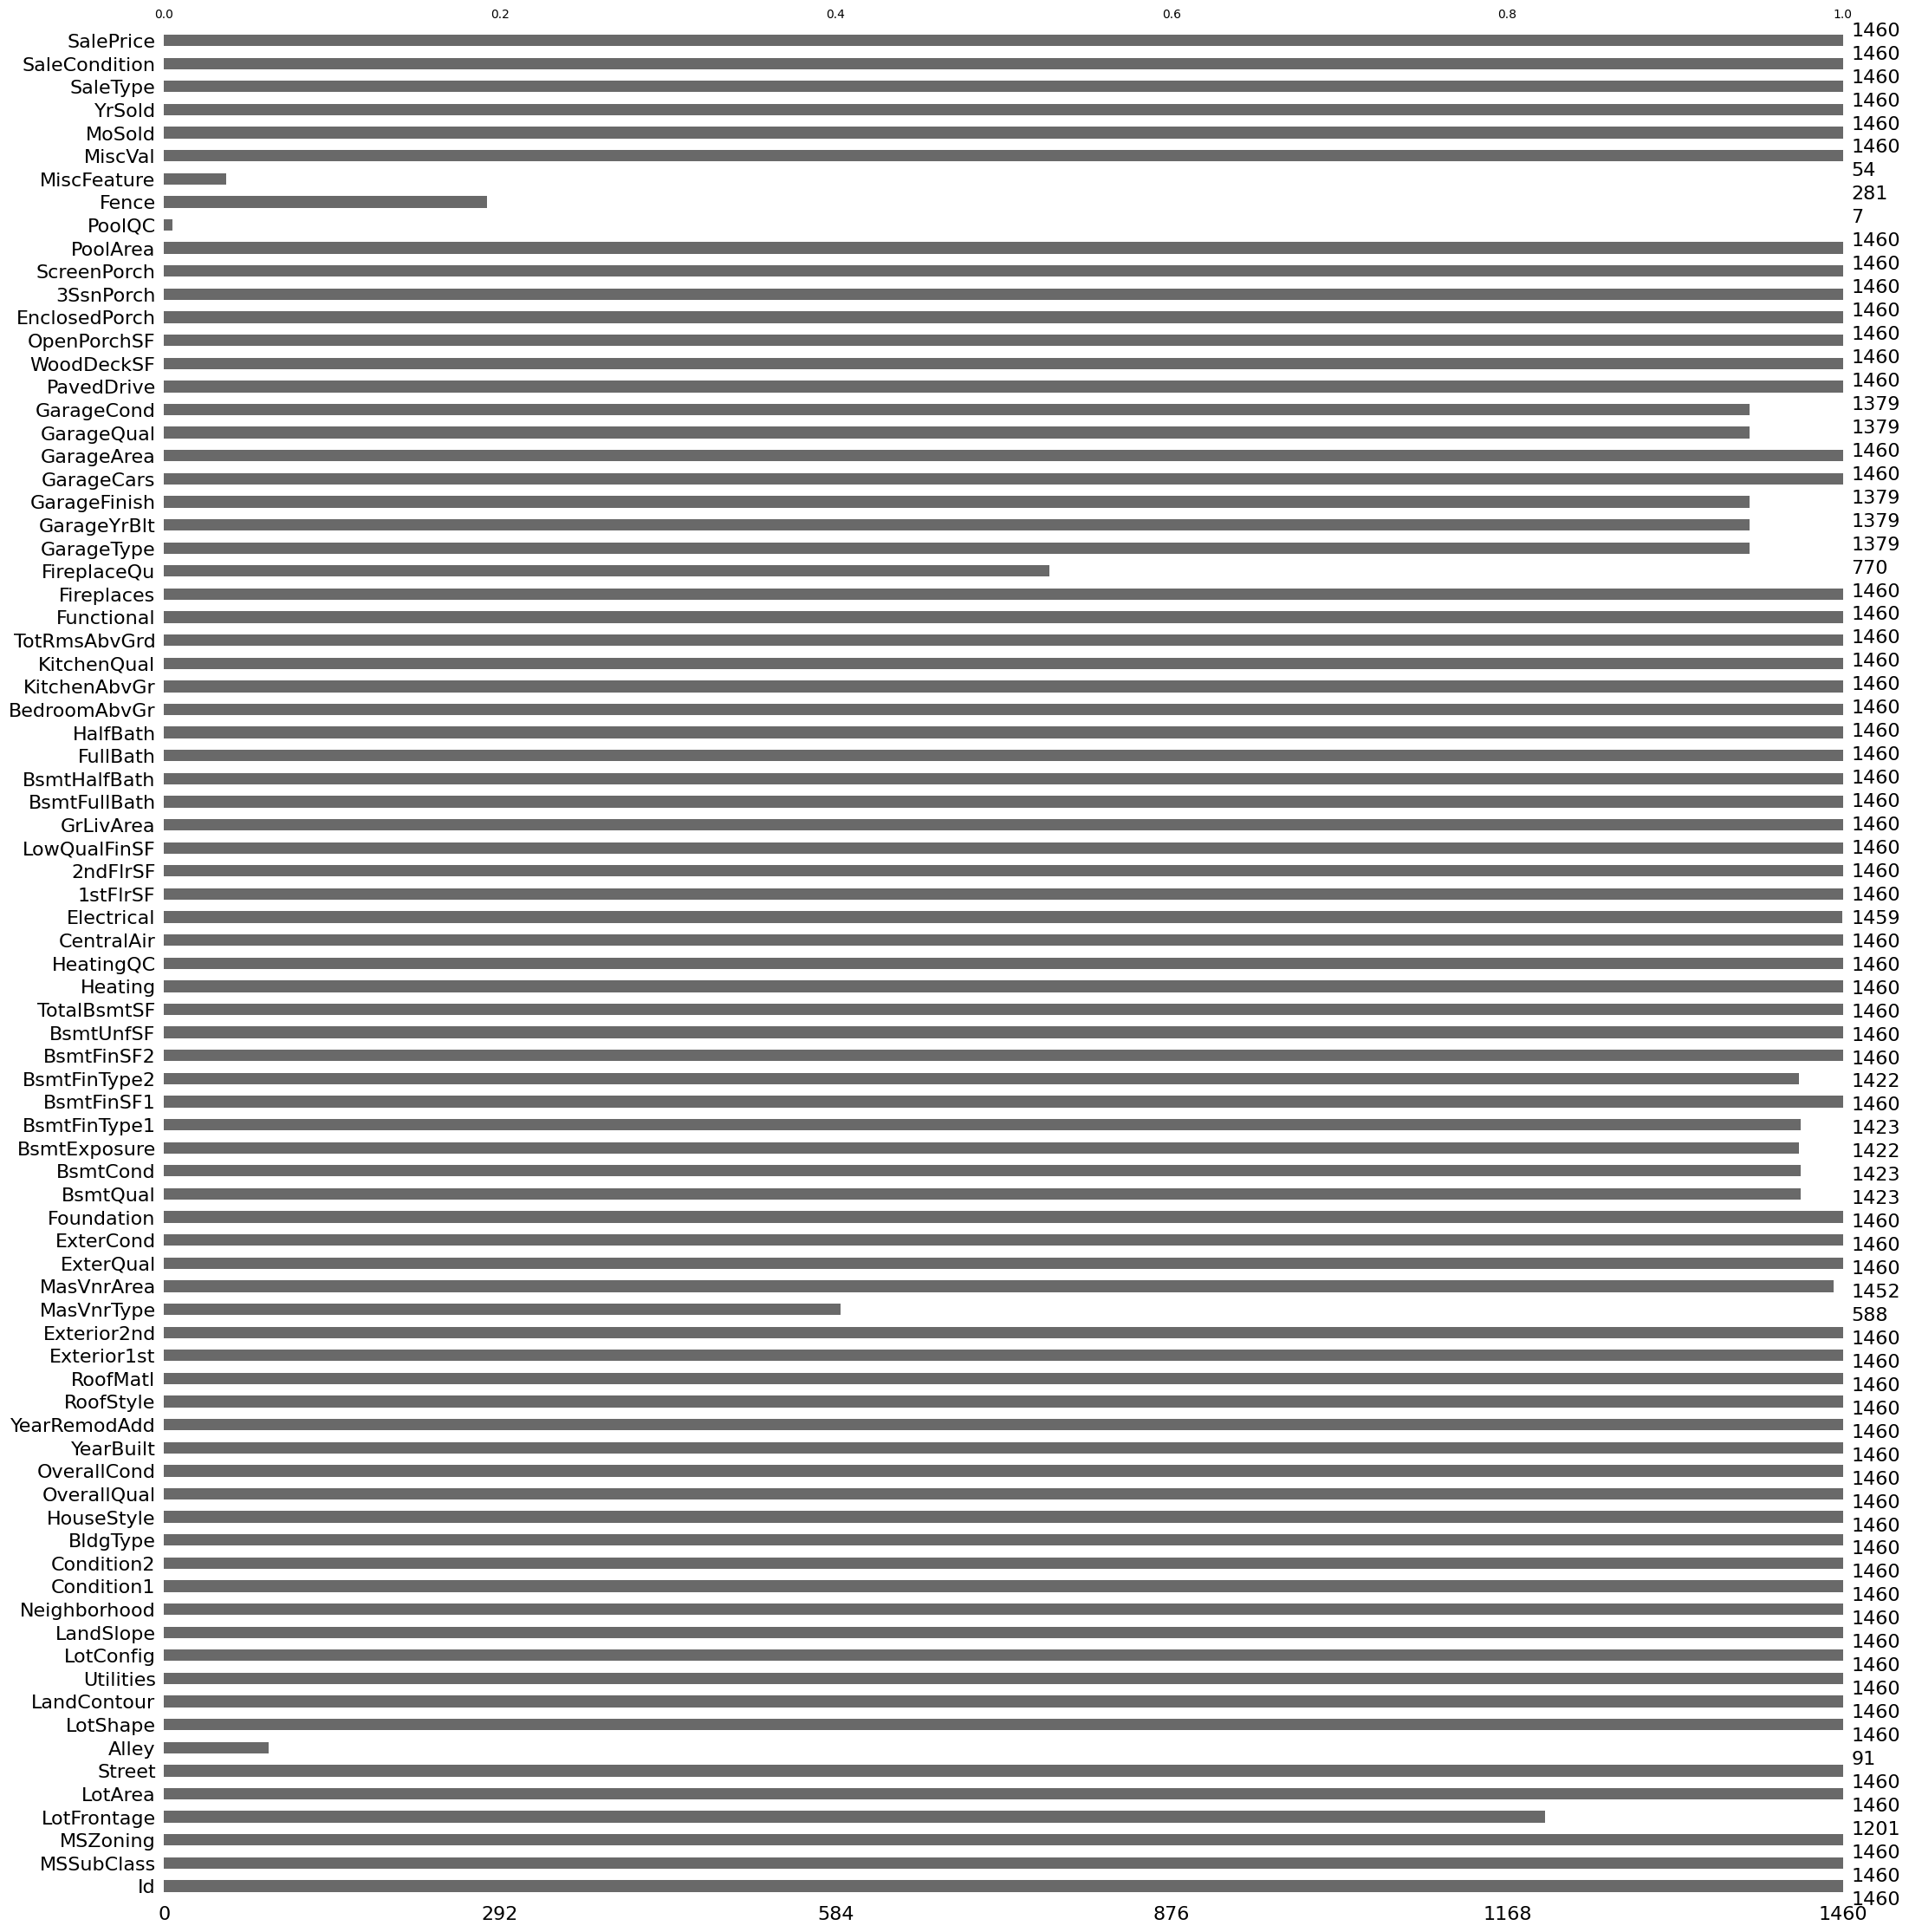

In [12]:
msno.bar(df)

In [13]:
# Calcular el número total de valores faltantes por columna
missing_values = df.isna().sum()

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_values / len(df)) * 100

# Crear un DataFrame con los resultados
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Mostrar el resultado
print(missing_data)

               Missing Values  Percentage
Id                          0    0.000000
MSSubClass                  0    0.000000
MSZoning                    0    0.000000
LotFrontage               259   17.739726
LotArea                     0    0.000000
...                       ...         ...
MoSold                      0    0.000000
YrSold                      0    0.000000
SaleType                    0    0.000000
SaleCondition               0    0.000000
SalePrice                   0    0.000000

[81 rows x 2 columns]


Delete features (columns) that have 5 or more missing values.


In [14]:
df = df.dropna(axis=1, thresh=len(df) - 5)

Samples (rows) with missing values are deleted from the data from which features with 5 or more missing values have been deleted.

In [15]:
df = df.dropna()

In [16]:
#Verify data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   int64 
 16  OverallCond    1459 non-null   int64 
 17  YearBuilt      1459 non-null   int64 
 18  YearRemodAdd   1459 non-null   in

In [17]:
# Calcular el número total de valores faltantes por columna
missing_values = df.isna().sum()

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_values / len(df)) * 100

# Crear un DataFrame con los resultados
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Mostrar el resultado
print(missing_data)

               Missing Values  Percentage
Id                          0         0.0
MSSubClass                  0         0.0
MSZoning                    0         0.0
LotArea                     0         0.0
Street                      0         0.0
...                       ...         ...
MoSold                      0         0.0
YrSold                      0         0.0
SaleType                    0         0.0
SaleCondition               0         0.0
SalePrice                   0         0.0

[63 rows x 2 columns]


Objective variable

The next step is to check what kind of distribution the objective variable have.

**[Problem 5] Researching terminology**

You will need to know the following two words. Please research and summarize these.

kurtosis
skewness

**KURTOSIS**
Kurtosis is a statistical measure that describes the shape of the data distribution compared to a normal distribution. Specifically, kurtosis indicates the "sharpness" or "flatness" of the distribution.

Mesokurtic (Mesokurtic):
Kurtosis value close to 0.
The distribution has a shape similar to a normal distribution.

Leptokurtic (Leptokurtic):
Positive kurtosis value (greater than 0).
The distribution has a heavier "tail" and higher, sharper peaks than the normal distribution.
Indicates that there are more values ​​at the extremes (tails).

Platykurtic (Platykurtic):
Negative kurtosis value (less than 0).
The distribution is "flatter" than the normal distribution.
Indicates that there are fewer values ​​at the extremes (tails).


**SKEWNESS**

Skewness is a statistical measure that describes the asymmetry of the data distribution around its mean. Indicates the direction and degree of skewness in a distribution.

Positive Skewness:
Skewness value greater than 0.
The right tail (larger values) is longer or heavier than the left tail.
Indicates that high extreme values ​​are more common.
Example: Income in many populations, where a minority has much higher incomes than the majority.

Negative Skewness:
Skewness value less than 0.
The left tail (smaller values) is longer or heavier than the right tail.
Indicates that low extreme values ​​are more common.
Example: Exam grades where the majority of students obtain high grades.

Zero Skewness (Symmetrical):
Skewness value equal to 0.
The distribution is symmetrical around the mean.
Example: Normal distribution.

**[Problem 6] Confirming distribution**


Use seaborn's sns.displot() and sns.histplot() to display the distribution of objective variables and calculate "kurtosis" and "skewness".

Kurtosis: -0.0467663244783294
Skewness: 0.03385895323565712


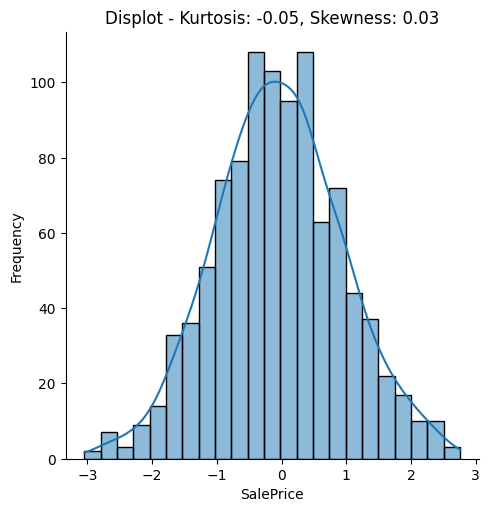

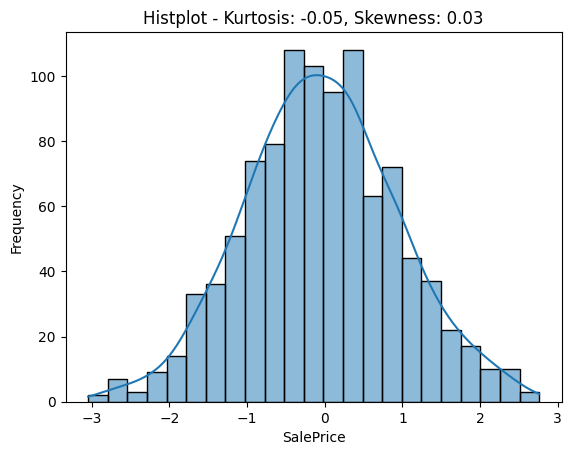

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import seaborn as sns
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Create a DataFrame
df = pd.DataFrame(data, columns=['SalePrice'])

# Calculate kurtosis and skewness
kurt_value = kurtosis(df['SalePrice'])
skew_value = skew(df['SalePrice'])

print(f"Kurtosis: {kurt_value}")
print(f"Skewness: {skew_value}")

# Visualize the distribution with sns.displot()
sns.displot(df['SalePrice'], kde=True)
plt.title(f"Displot - Kurtosis: {kurt_value:.2f}, Skewness: {skew_value:.2f}")
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution with sns.histplot()
sns.histplot(df['SalePrice'], kde=True)
plt.title(f"Histplot - Kurtosis: {kurt_value:.2f}, Skewness: {skew_value:.2f}")
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

Perform a logarithmic transformation on the objective variable

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

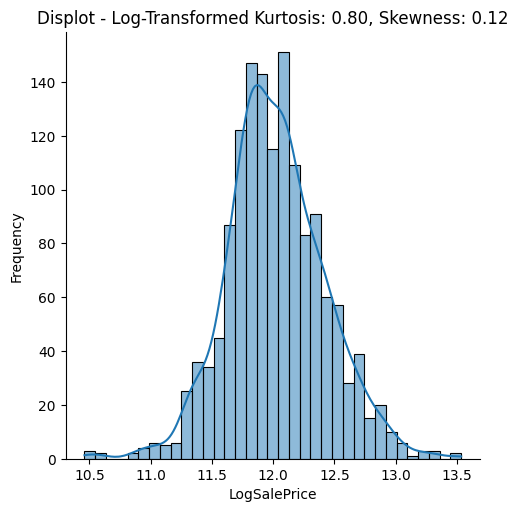

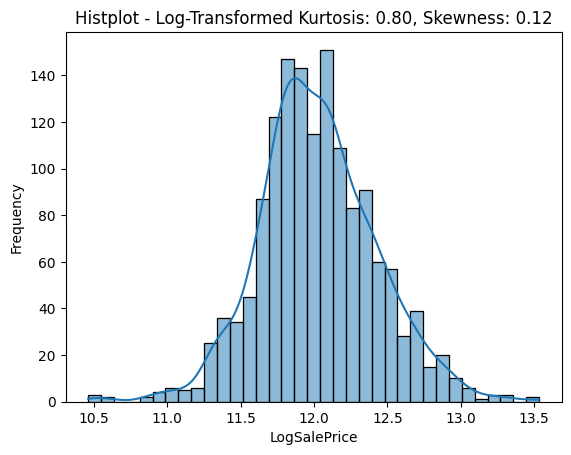

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Example: Load your dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('train.csv')

# Display the first few rows of the dataframe
print(df.head())

# Apply logarithmic transformation to the 'SalePrice' column
df['LogSalePrice'] = np.log(df['SalePrice'])

# Display the first few rows of the dataframe to check the new column
print(df[['SalePrice', 'LogSalePrice']].head())

# Calculate kurtosis and skewness for the log-transformed data
kurt_value = kurtosis(df['LogSalePrice'])
skew_value = skew(df['LogSalePrice'])

print(f"Log-Transformed Kurtosis: {kurt_value}")
print(f"Log-Transformed Skewness: {skew_value}")

# Visualize the distribution with sns.displot()
sns.displot(df['LogSalePrice'], kde=True)
plt.title(f"Displot - Log-Transformed Kurtosis: {kurt_value:.2f}, Skewness: {skew_value:.2f}")
plt.xlabel('LogSalePrice')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution with sns.histplot()
sns.histplot(df['LogSalePrice'], kde=True)
plt.title(f"Histplot - Log-Transformed Kurtosis: {kurt_value:.2f}, Skewness: {skew_value:.2f}")
plt.xlabel('LogSalePrice')
plt.ylabel('Frequency')
plt.show()

The distribution is displayed for the logarithmically transformed one, and the "kurtosis" and "skewness" are also calculated.

Please explain the change before and after logarithmic transformation, including the term "normal distribution". By processing in this way, the accuracy at the time of prediction can be improved.

seaborn.displot — seaborn 0.11.1 documentation
seaborn.histplot — seaborn 0.11.1 documentation

**Answer**
Both reflect how the transformation affects the shape and symmetry of the data distribution.

The logarithmic transformation of SalePrice typically results in:

Reduced Skewness: Making the distribution more symmetric.
Reduced Kurtosis: Reducing the impact of outliers, leading to a more normal-like distribution.
This transformation is especially useful in regression modeling and other statistical analyses where normality and reduced outliers can improve model performance and interpretation.

**[Problem 7] Confirming the correlation coefficient**

We will check the features. For each one, please write down a markdown description and discussion.

Create a heat map of the correlation coefficient matrix and find the relationships with high correlation coefficients.

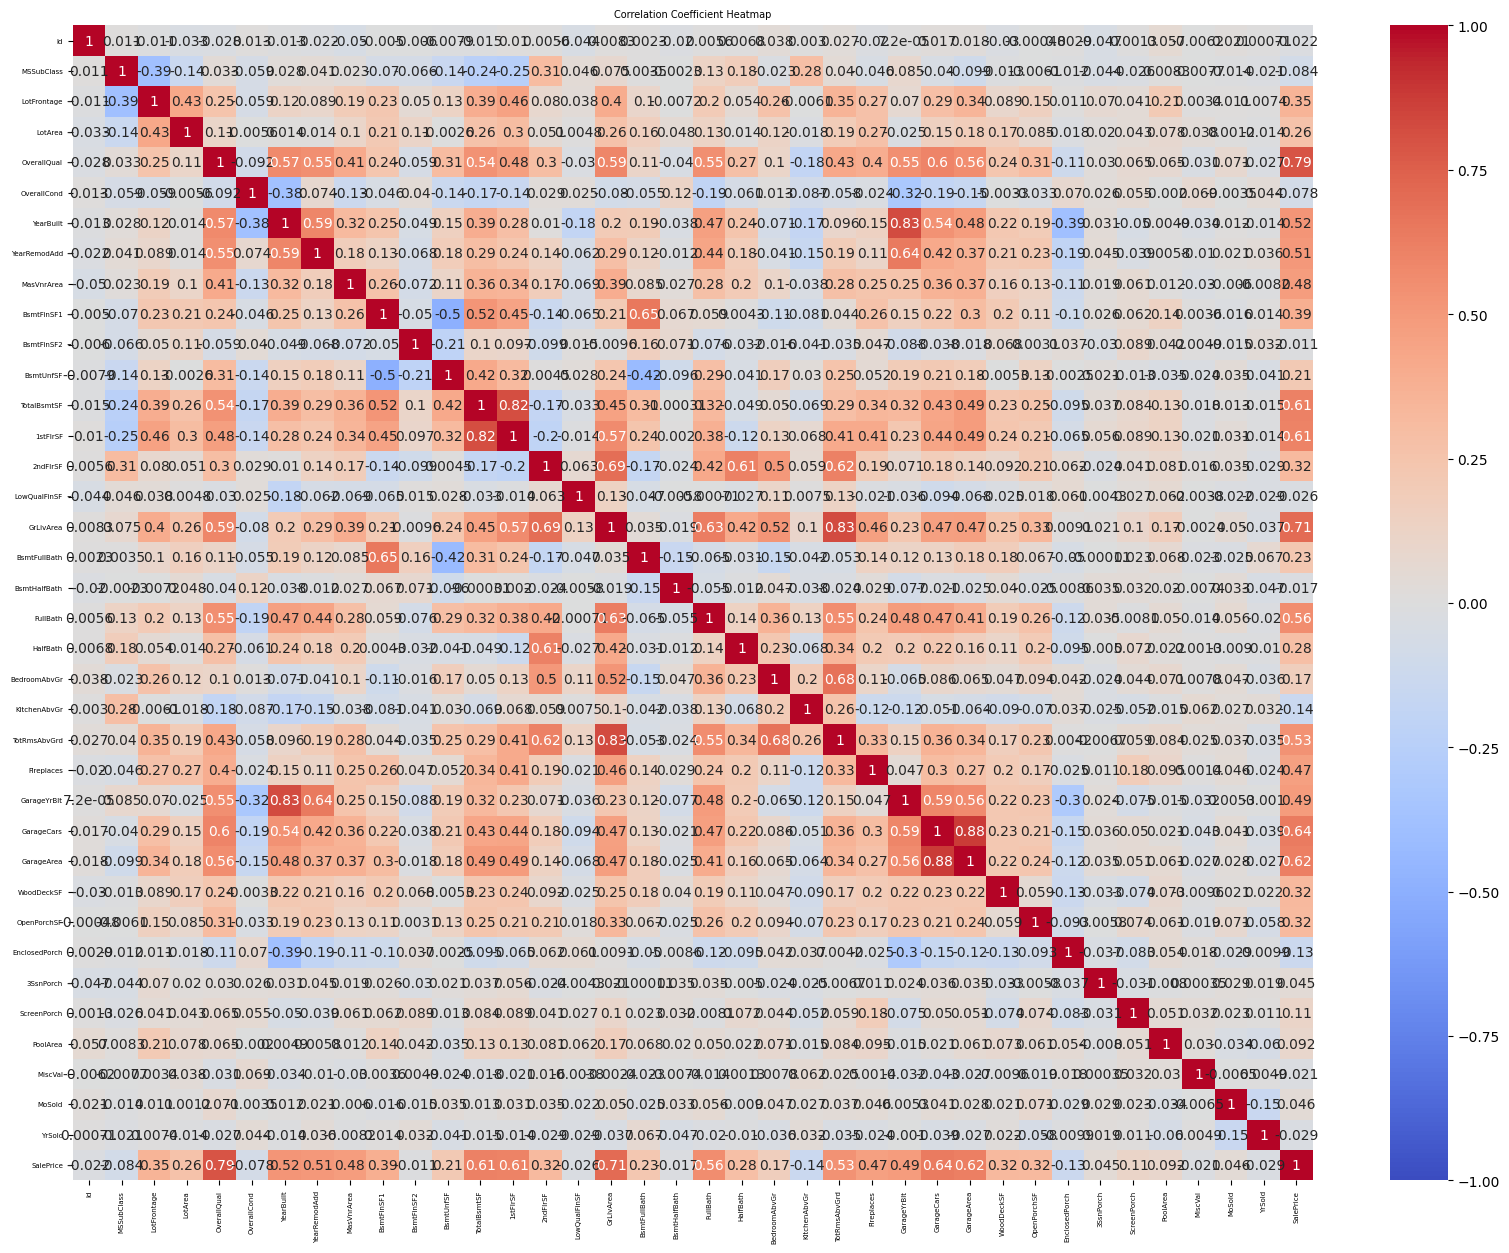

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('train.csv')

# Identify non-numeric columns (e.g., categorical columns)
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Exclude non-numeric columns from correlation calculation
numeric_df = df.drop(columns=non_numeric_columns)

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap with smaller font size for axis labels
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set axis label font sizes
plt.xticks(fontsize=5)  # X-axis labels fontsize
plt.yticks(fontsize=5)  # Y-axis labels fontsize

plt.title('Correlation Coefficient Heatmap', fontsize=7)  # Title fontsize
plt.show()

Select 10 features that have a high correlation with the target variable, and create a correlation coefficient matrix heat map for these.

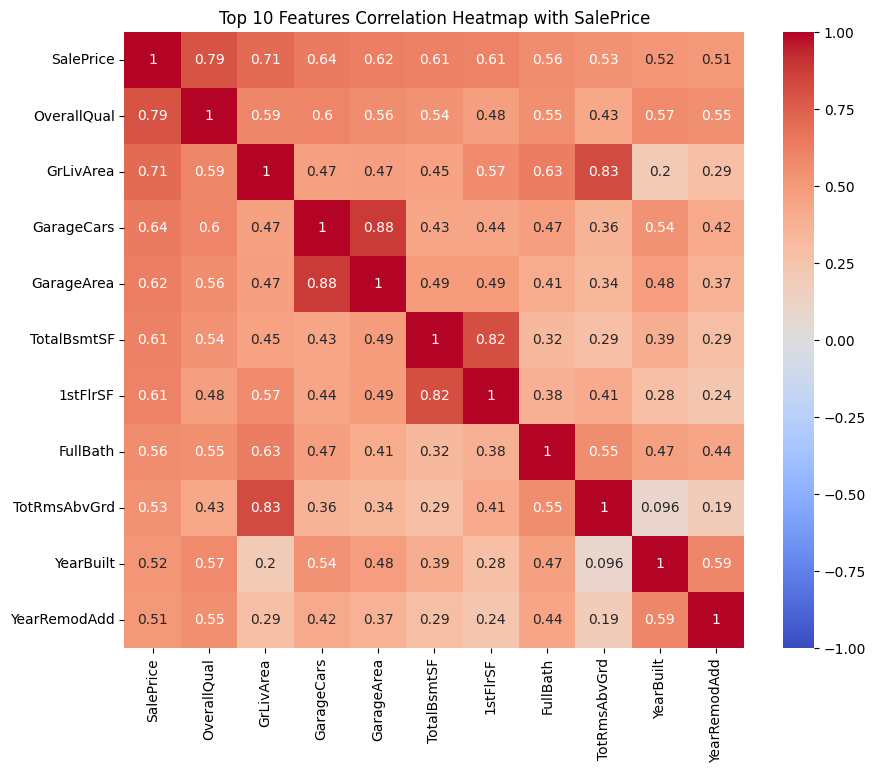

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('train.csv')

# Identify non-numeric columns (e.g., categorical columns)
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Exclude non-numeric columns from correlation calculation
numeric_df = df.drop(columns=non_numeric_columns)

# Calculate correlation matrix with numeric columns
corr_matrix = numeric_df.corr()

# Select top 10 features correlated with 'SalePrice'
top_corr_features = corr_matrix['SalePrice'].abs().nlargest(11).index  # Select 11 to include 'SalePrice'
top_corr_matrix = df[top_corr_features].corr()

# Create a heatmap for top correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Top 10 Features Correlation Heatmap with SalePrice')
plt.show()

Summarize whether the 10 selected features represent something by referring to the description in Kaggle's DataDescription.

According to results on correlation rate, there is a significant correlation between the objective variable and variable related to area where the house is located and the amenities and facilities of the house

Find 3 combinations of the 10 selected features that have high correlation coefficients with each other.


GarageArea-GarageCars 0.88
GrLivArea-TotRmsAbvGrd 0.83
lstFlrSF - TotalBsmtSF 0.82

